# **LOAD AND EXPLORE DATA**


![texto alternativo](https://stillmed.olympic.org/media/Images/OlympicOrg/News/2017/10/11/2017-10-11-baseball-thumbnail-2.jpg?interpolation=lanczos-none&resize=*:*)

We wish to predict a baseball player’s Salary on the basis of various statistics
associated with performance in the previous year.

### **INITIAL WORKING ENVIRONMENT SET UP**

In [0]:
# Utils
import math

# Data manipulation
import numpy as np
import pandas as pd

### **READ DATA**


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/AzIz000/machine-learning/master/datasets/Hitters.csv')
data.head()

,Player,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


### **EXPLORE METADATA**


**Analize data set:**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player     322 non-null    object 
 1   AtBat      322 non-null    int64  
 2   Hits       322 non-null    int64  
 3   HmRun      322 non-null    int64  
 4   Runs       322 non-null    int64  
 5   RBI        322 non-null    int64  
 6   Walks      322 non-null    int64  
 7   Years      322 non-null    int64  
 8   CAtBat     322 non-null    int64  
 9   CHits      322 non-null    int64  
 10  CHmRun     322 non-null    int64  
 11  CRuns      322 non-null    int64  
 12  CRBI       322 non-null    int64  
 13  CWalks     322 non-null    int64  
 14  League     322 non-null    object 
 15  Division   322 non-null    object 
 16  PutOuts    322 non-null    int64  
 17  Assists    322 non-null    int64  
 18  Errors     322 non-null    int64  
 19  Salary     263 non-null    float64
 20  NewLeague 

**Drop rows with missing Salary**

In [4]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player     263 non-null    object 
 1   AtBat      263 non-null    int64  
 2   Hits       263 non-null    int64  
 3   HmRun      263 non-null    int64  
 4   Runs       263 non-null    int64  
 5   RBI        263 non-null    int64  
 6   Walks      263 non-null    int64  
 7   Years      263 non-null    int64  
 8   CAtBat     263 non-null    int64  
 9   CHits      263 non-null    int64  
 10  CHmRun     263 non-null    int64  
 11  CRuns      263 non-null    int64  
 12  CRBI       263 non-null    int64  
 13  CWalks     263 non-null    int64  
 14  League     263 non-null    object 
 15  Division   263 non-null    object 
 16  PutOuts    263 non-null    int64  
 17  Assists    263 non-null    int64  
 18  Errors     263 non-null    int64  
 19  Salary     263 non-null    float64
 20  NewLeague 

In [5]:
data.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027,118.760456,8.593156,535.925882
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,279.934575,145.080577,6.606574,451.118681
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000,8.000000,3.000000,190.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000,45.000000,7.000000,425.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000,192.000000,13.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000,492.000000,32.000000,2460.000000


### **EXPLORE DATA**

In [6]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Plot data:**

In [7]:
sns.pairplot(data)

Output hidden; open in https://colab.research.google.com to view.

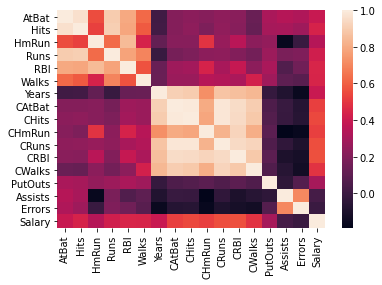

In [8]:
sns.heatmap(data.corr())

# **MODEL DATA**

## **RIDGE REGRESSION**

 **The `Ridge()` function has an alpha argument that is used to tune the model. We'll generate an array of alpha values ranging from very big to very small, essentially
covering the full range of scenarios from the null model containing
only the intercept, to the least squares fit:**

### **ESTIMATING THE COEFFICIENTS**

**Associated with each alpha value is a vector of ridge regression coefficients, which we'll
store in a matrix `coefs`. In this case, it is a $16 \times 100$
matrix, with 16 rows (one for each predictor) and 100
columns (one for each value of alpha)**

In [9]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import scale

#Generate different alphas for testing
alphas = 10**np.linspace(10,-2,100)*0.5
#print(alphas)

X = data[['AtBat','Hits','HmRun','Runs','RBI','Walks','Years','CAtBat','CHits','CHmRun','CRuns','CRBI','CWalks','PutOuts','Assists','Errors']]
X_std = scale(X)
y = data[['Salary']]
coefs = []
ridge = Ridge()

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_std, y)
    coefs.append(ridge.coef_.flatten())
    
np.shape(coefs)

(100, 16)

**We expect the coefficient estimates to be much smaller, in terms of $l_2$ norm,
when a large value of alpha is used, as compared to when a small value of alpha is
used. Let's plot and find out:**

Text(0, 0.5, 'weights')

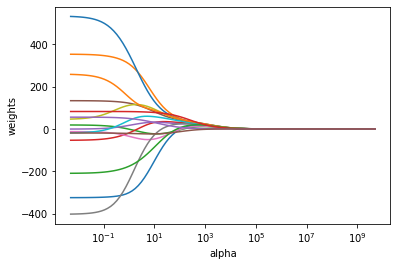

In [10]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

###**RANDOM TESTS**

**Next we fit a ridge regression model on the training set, and evaluate
its MSE on the test set, using $\lambda = 4$:**

In [11]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test , y_train, y_test = train_test_split(X_std, y, test_size=0.5, random_state=1)

ridge2 = Ridge(alpha = 4)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge2.coef_.flatten(), index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred2))          # Calculate the test MSE

AtBat     -235.958409
Hits       184.420097
HmRun      -63.275718
Runs         4.429924
RBI        109.297456
Walks       81.956649
Years      -42.858798
CAtBat    -113.465131
CHits       90.618648
CHmRun      80.568749
CRuns      106.039695
CRBI       103.804324
CWalks     -29.729088
PutOuts    127.192159
Assists     37.110460
Errors     -14.509748
dtype: float64
108409.07929258361


**Now let's see what happens if we use a huge value of alpha, say $10^{10}$:**


In [12]:
ridge3 = Ridge(alpha = 10**10)
ridge3.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred3 = ridge3.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge3.coef_.flatten(), index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred3))          # Calculate the test MSE

AtBat      2.514813e-06
Hits       2.912660e-06
HmRun      1.986276e-06
Runs       2.685289e-06
RBI        3.189361e-06
Walks      3.118248e-06
Years      2.473459e-06
CAtBat     3.257461e-06
CHits      3.480687e-06
CHmRun     3.711503e-06
CRuns      3.474689e-06
CRBI       3.938490e-06
CWalks     3.029160e-06
PutOuts    3.055508e-06
Assists   -4.753637e-08
Errors     1.674891e-07
dtype: float64
172862.22033338354


**This big penalty shrinks the coefficients to a very large degree, essentially reducing to a model containing just the intercept. This over-shrinking makes the model more biased, resulting in a higher MSE.**




**Okay, so fitting a ridge regression model with alpha = 4 leads to a much lower test MSE than fitting a model with just an intercept. We now check whether there is any benefit to performing ridge regression with alpha = 4 instead of just performing least squares regression. Recall that least squares is simply ridge regression with alpha = 0.**

In [0]:
ridge4 = Ridge(alpha = 0)
ridge4.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred = ridge4.predict(X_test)            # Use this model to predict the test data
print(pd.Series(ridge4.coef_.flatten(), index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred))           # Calculate the test MSE

AtBat      -308.855418
Hits        194.942422
HmRun       -65.575729
Runs         -0.833707
RBI         156.170034
Walks        69.335538
Years        19.921023
CAtBat    -1301.075594
CHits      1370.422473
CHmRun      247.541249
CRuns        97.183105
CRBI       -237.295760
CWalks       53.006422
PutOuts     127.375955
Assists      74.585903
Errors      -31.870217
dtype: float64
120478.00839885442


### **CV APPROACH**

**It looks like we are indeed improving over regular least-squares!**

**Instead of arbitrarily choosing alpha $ = 4$, it would be better to
use cross-validation to choose the tuning parameter alpha. We can do this using
the cross-validated ridge regression function, `RidgeCV()`. By default, the function
performs generalized cross-validation, though this can be changed using the
argument `cv`**

In [0]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

87.37642000038414

## **THE LASSO**

**We saw that ridge regression with a wise choice of alpha can outperform least
squares on the Hitters data set. We now ask
whether the lasso can yield either a more accurate or a more interpretable
model than ridge regression.** 

**In order to fit a lasso model, we'll
use the `Lasso()` function; however, this time we'll need to include the argument `max_iter = 10000`.
Other than that change, we proceed just as we did in fitting a ridge model.**


Text(0, 0.5, 'weights')

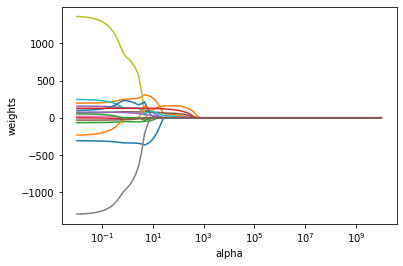

In [0]:
from sklearn.linear_model import Lasso

lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

**Notice that in the coefficient plot that depending on the choice of tuning
parameter, some of the coefficients are exactly equal to zero. We now
perform 10-fold cross-validation to choose the best alpha, refit the model, and compute the associated test error:**

In [0]:
from sklearn.linear_model import LassoCV

lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


111102.48117114395

**This is substantially lower than the test set MSE of least squares, and only a little worse than the test MSE of ridge regression with alpha
chosen by cross-validation.**

**However, the lasso has a substantial advantage over ridge regression in
that the resulting coefficient estimates are sparse. Here we see that 13 of
the 19 coefficient estimates are exactly zero:**

In [0]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

AtBat        0.000000
Hits        44.409023
HmRun        0.000000
Runs         0.000000
RBI          6.334964
Walks       61.161069
Years        0.000000
CAtBat       0.000000
CHits        0.000000
CHmRun      22.351127
CRuns        0.000000
CRBI       160.939219
CWalks       0.000000
PutOuts    111.621971
Assists      0.000000
Errors      -0.000000
dtype: float64

# **REFERENCES**

[1] [Clark Science Center](http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html)